# Human

In [1]:

# 使用 warnings 库来忽略警告
import warnings
warnings.filterwarnings('ignore')
import MultiGATE
# P22 ME13 Human
import pandas as pd;import numpy as np
import scanpy as sc;import matplotlib.pyplot as plt;import os;import sys


from sklearn.metrics.cluster import adjusted_rand_score

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

base_path = './output/human'
# from datetime import datetime

file_name= "../data_tutorial/human/Human_RNA.h5ad" #RNA
stage = os.path.basename(file_name).split('_')[0]
adata1 = sc.read_h5ad(file_name)
# a = datetime.now()
# print('Start time: ', a.strftime('%H:%M:%S'))
adata1.obsm["spatial"][:, 1]= adata1.obsm["spatial"][:, 1]*(-1)  # Hu_man ME_13
#adata1.obsm["spatial"] = adata1.obsm["spatial"][:, [1, 0]]
#adata1.obsm["spatial"] = adata1.obsm["spatial"]*(-1)

MultiGATE.Cal_Spatial_Net(adata1, rad_cutoff=100) #Human 150 P22 50
MultiGATE.Stats_Spatial_Net(adata1)



file_name= "../data_tutorial/human/Human_ATAC_lsi.h5ad" #ATAC  _lsi
#stage = os.path.basename(file_name).split('.')[0]
adata2 = sc.read_h5ad(file_name)
# a = datetime.now()
# print('Start time: ', a.strftime('%H:%M:%S'))
adata2.obsm["spatial"][:, 1]= adata2.obsm["spatial"][:, 1]*(-1)  # Hu_man ME_13
#adata2.obsm["spatial"] = adata2.obsm["spatial"][:, [1, 0]]
#adata2.obsm["spatial"] = adata2.obsm["spatial"]*(-1)


MultiGATE.Cal_Spatial_Net(adata2, rad_cutoff=100) #Human 150 P22 50
MultiGATE.Stats_Spatial_Net(adata2)

adata1 = adata1[:, adata1.var['highly_variable']]
adata2 = adata2[:, adata2.var['highly_variable']]
#'Top','Overlap','Bottom'
MultiGATE.Cal_gene_peak_Net_new(adata1, adata2, 150000,file = '../data_tutorial/human/gencode.v25.chr_patch_hapl_scaff.annotation.gtf.gz')

#MultiGATE.Cal_gene_peak_Net(adata1, adata2, 150000, states = ['Top','Overlap','Bottom'],file = '/lustre/project/Stat/s1155077016/Spatial_multi-omics_data/Human/gencode.v25.chr_patch_hapl_scaff.annotation.gtf.gz') #Human 150 P22 50
adata1.uns['gene_peak_Net'] = adata2.uns['gene_peak_Net'] 
#df = pd.read_csv('/lustre/project/Stat/s1155077016/Spatial_multi-omics_data/Human/pair_glue.csv') # test_0108
#adata1.uns['gene_peak_Net'] = df # test_0108
#adata2.uns['gene_peak_Net'] = df # test_0108

num_epoch = 1000 #1000  3000
adata1, adata2 = MultiGATE.train_MultiGATE(adata1, adata2, bp_width = 2000,alpha=0,n_epochs=num_epoch,save_attention=True) # 3000 epoch 400bpwidth / 1000epoch 2000bpwidth
#nvidia_smi.nvmlInit()
#handle = nvidia_smi.nvmlDeviceGetHandleByIndex(0)
#info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)

#memb = info.used
#print("memb:",memb)
#print(stage,"tf.max_memory_allocated: %fGB" % (memb / 1024 / 1024 / 1024))
#1.0#

In [4]:
os.environ['R_HOME'] = "/lustre/project/Stat/s1155077016/condaenvs/Seurat4/lib/R"  #/users/s1155077016/anaconda3/envs/seurate4
os.environ['R_USER'] = '/users/s1155077016/anaconda3/lib/python3.9/site-packages/rpy2'


<AxesSubplot:title={'center':'Multi-GATE_AVG'}, xlabel='spatial1', ylabel='spatial2'>

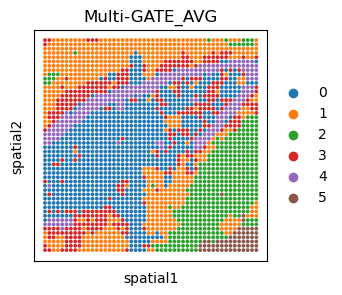

In [5]:
size = 30 ;
sc.pp.neighbors(adata1, use_rep='MultiGATE_clip_all',key_added = 'avg');resolution =  0.6 ;sc.tl.umap(adata1,neighbors_key = 'avg');sc.tl.louvain(adata1, resolution=resolution,neighbors_key = 'avg')
plt.rcParams["figure.figsize"] = (3, 3);sc.pl.embedding(adata1, basis="spatial", color="louvain",s=size, show=False, title='Multi-GATE_AVG')


In [ ]:

MultiGATE.wnn_R(adata1, adata2, res = 1.0) # resolution


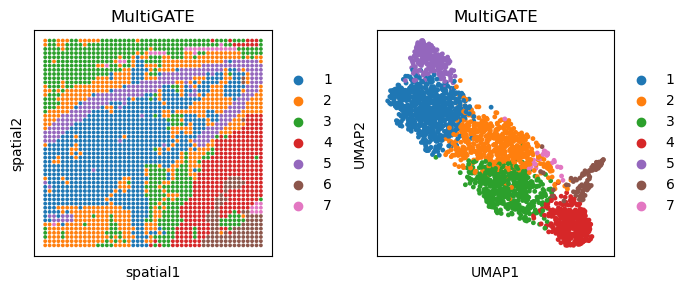

In [7]:
import matplotlib.pyplot as plt
import scanpy as sc

# 设置整体图形的大小
plt.rcParams["figure.figsize"] = (7, 3)  # 宽度10，高度5

# 创建一个 1 行 2 列的子图布局
fig, axs = plt.subplots(1, 2)

# 第一个子图：spatial embedding
sc.pl.embedding(adata1, basis="spatial", color="wnn", s=size, title='MultiGATE', ax=axs[0], show=False)

# 第二个子图：UMAP
sc.pl.umap(adata1, color="wnn", title='MultiGATE', ax=axs[1], show=False)

# 显示整个图形
plt.tight_layout()
plt.show()
